# MSDS 7331 - Data Mining

# Mini-Project: SVM&LR Classification

by: Evangelos Giakoumakis

Note on references:
Our code is heavily based on the 04. Logits and SVM ipynb file that was provided for this class by Professor Yang. We tried to include needed references in the cells where applicable. They should be distinct from other comments by a double hashtag (##). The document from which we based our code is often referred to as the file or the provided file. 

Note on changing parameters discussion:
Much of our discussion on changing parameters of a model occurs in the "Model Advantages" section towards the end of the assignment. 

### SVM and Logistic Regression Modeling

Before attempting to perform Logistic Regression (LR) and Support Vector Machinesn(SVM) we must first import required libraries as well as dataset. Then verify correct import and get basic dataset information.

In [2]:
# load libraries
import pandas as pd
import numpy as np
    
#load the dataset
df = pd.read_csv('data/ks-projects-201612-cleaned.csv',  sep = ',')  

# display general info of dataset 
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319556 entries, 0 to 319555
Data columns (total 12 columns):
uniqueId          319556 non-null int64
name              319554 non-null object
category          319556 non-null object
main_category     319556 non-null object
currency          319556 non-null object
deadline          319556 non-null object
goal              319556 non-null float64
launched          319556 non-null object
pledged           319556 non-null float64
state             319556 non-null object
backers           319556 non-null int64
country           319556 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 29.3+ MB


,uniqueId,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
0,5971,An American Apocalypse: The Reckoning,Comics,Comics,USD,8/6/2012 20:00,48000.0,6/8/2012 18:46,376.0,failed,7,US
1,18520,Grandma's are Life,World Music,Music,USD,11/18/2016 15:32,15000.0,10/19/2016 15:32,62.0,failed,4,US
2,21109,Meta,Performance Art,Art,GBP,5/6/2015 23:00,150.0,4/8/2015 0:37,173.0,successful,11,GB
3,21371,Water Powered Car,Technology,Technology,USD,8/10/2016 19:02,75000.0,7/26/2016 19:02,120.0,failed,4,US
4,24380,Puss N' Books: A relaxing cat cafe and bookstore.,Spaces,Food,USD,11/26/2015 17:25,20000.0,10/27/2015 16:25,776.0,failed,18,US


In the following section we attempt to shape data in an appropriate format for us to run SVM and LR.

In [3]:
# create state boolean for svm 
df['bl_states'] = df['state ']
df['bl_states'] = df['bl_states'].replace(to_replace='failed',value=False)
df['bl_states'] = df['bl_states'].replace(to_replace='canceled',value=False)
df['bl_states'] = df['bl_states'].replace(to_replace='suspended',value=False)
df['bl_states'] = df['bl_states'].replace(to_replace='successful',value=True)
df['bl_states'] = df['bl_states'].replace(to_replace='live',value=True)

# create currency numerical categories for svm 
df['num_currency'] = df['currency ']
df['num_currency'] = df['num_currency'].replace(to_replace='USD',value=1)
df['num_currency'] = df['num_currency'].replace(to_replace='GBP',value=2)
df['num_currency'] = df['num_currency'].replace(to_replace='EUR',value=3)
df['num_currency'] = df['num_currency'].replace(to_replace='CAD',value=4)
df['num_currency'] = df['num_currency'].replace(to_replace='AUD',value=5)
df['num_currency'] = df['num_currency'].replace(to_replace='CHF',value=6)
df['num_currency'] = df['num_currency'].replace(to_replace='DKK',value=7)
df['num_currency'] = df['num_currency'].replace(to_replace='HKD',value=8)
df['num_currency'] = df['num_currency'].replace(to_replace='MXN',value=9)
df['num_currency'] = df['num_currency'].replace(to_replace='NOK',value=10)
df['num_currency'] = df['num_currency'].replace(to_replace='NZD',value=11)
df['num_currency'] = df['num_currency'].replace(to_replace='SEK',value=12)
df['num_currency'] = df['num_currency'].replace(to_replace='SGD',value=13)

# create main_category numerical categories for svm 
df['num_category'] = df['main_category ']
df['num_category'] = df['num_category'].replace(to_replace='Art',value=1)
df['num_category'] = df['num_category'].replace(to_replace='Comics',value=2)
df['num_category'] = df['num_category'].replace(to_replace='Crafts',value=3)
df['num_category'] = df['num_category'].replace(to_replace='Dance',value=4)
df['num_category'] = df['num_category'].replace(to_replace='Design',value=5)
df['num_category'] = df['num_category'].replace(to_replace='Fashion',value=6)
df['num_category'] = df['num_category'].replace(to_replace='Film & Video',value=7)
df['num_category'] = df['num_category'].replace(to_replace='Food',value=8)
df['num_category'] = df['num_category'].replace(to_replace='Games',value=9)
df['num_category'] = df['num_category'].replace(to_replace='Journalism',value=10)
df['num_category'] = df['num_category'].replace(to_replace='Music',value=11)
df['num_category'] = df['num_category'].replace(to_replace='Photography',value=12)
df['num_category'] = df['num_category'].replace(to_replace='Publishing',value=13)
df['num_category'] = df['num_category'].replace(to_replace='Technology',value=14)
df['num_category'] = df['num_category'].replace(to_replace='Theater',value=15)

# create countries numerical categories for svm 
df['num_country'] = df['country ']
df['num_country'] = df['num_country'].replace(to_replace='US',value=1)
df['num_country'] = df['num_country'].replace(to_replace='GB',value=2)
df['num_country'] = df['num_country'].replace(to_replace='CA',value=3)
df['num_country'] = df['num_country'].replace(to_replace='AU',value=4)
df['num_country'] = df['num_country'].replace(to_replace='NL',value=5)
df['num_country'] = df['num_country'].replace(to_replace='AT',value=6)
df['num_country'] = df['num_country'].replace(to_replace='BE',value=7)
df['num_country'] = df['num_country'].replace(to_replace='CH',value=8)
df['num_country'] = df['num_country'].replace(to_replace='DE',value=9)
df['num_country'] = df['num_country'].replace(to_replace='DK',value=10)
df['num_country'] = df['num_country'].replace(to_replace='ES',value=11)
df['num_country'] = df['num_country'].replace(to_replace='FR',value=12)
df['num_country'] = df['num_country'].replace(to_replace='HK',value=13)
df['num_country'] = df['num_country'].replace(to_replace='IE',value=14)
df['num_country'] = df['num_country'].replace(to_replace='IT',value=15)
df['num_country'] = df['num_country'].replace(to_replace='LU',value=16)
df['num_country'] = df['num_country'].replace(to_replace='MX',value=17)
df['num_country'] = df['num_country'].replace(to_replace='N,"0',value=18)
df['num_country'] = df['num_country'].replace(to_replace='NL',value=19)
df['num_country'] = df['num_country'].replace(to_replace='NO',value=18)
df['num_country'] = df['num_country'].replace(to_replace='NZ',value=20)
df['num_country'] = df['num_country'].replace(to_replace='SE',value=21)
df['num_country'] = df['num_country'].replace(to_replace='SG',value=22)

## the format of these commands is based on code from the provided file.
df['IsUSD'] = df['currency ']=='USD'
df.IsUSD = df.IsUSD.astype(np.int)

df['IsGBP'] = df['currency ']=='GBP'
df.IsGBP = df.IsGBP.astype(np.int)

df['IsEUR'] = df['currency ']=='EUR'
df.IsEUR = df.IsEUR.astype(np.int)

df['IsCAD'] = df['currency ']=='CAD'
df.IsCAD = df.IsCAD.astype(np.int)

df['IsUS'] = df['country ']=='US'
df.IsUS = df.IsUS.astype(np.int)

df['IsGB'] = df['country ']=='GB'
df.IsGB = df.IsGB.astype(np.int)

df['IsCA'] = df['country ']=='CA'
df.IsCA = df.IsCA.astype(np.int)

df['IsAU'] = df['country ']=='AU'
df.IsAU = df.IsAU.astype(np.int)

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319556 entries, 0 to 319555
Data columns (total 24 columns):
uniqueId          319556 non-null int64
name              319554 non-null object
category          319556 non-null object
main_category     319556 non-null object
currency          319556 non-null object
deadline          319556 non-null object
goal              319556 non-null float64
launched          319556 non-null object
pledged           319556 non-null float64
state             319556 non-null object
backers           319556 non-null int64
country           319556 non-null object
bl_states         319556 non-null bool
num_currency      319556 non-null int64
num_category      319556 non-null int64
num_country       319556 non-null int64
IsUSD             319556 non-null int64
IsGBP             319556 non-null int64
IsEUR             319556 non-null int64
IsCAD             319556 non-null int64
IsUS              319556 non-null int64
IsGB              319556 non-null int6

,uniqueId,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,num_category,num_country,IsUSD,IsGBP,IsEUR,IsCAD,IsUS,IsGB,IsCA,IsAU
0,5971,An American Apocalypse: The Reckoning,Comics,Comics,USD,8/6/2012 20:00,48000.0,6/8/2012 18:46,376.0,failed,...,2,1,1,0,0,0,1,0,0,0
1,18520,Grandma's are Life,World Music,Music,USD,11/18/2016 15:32,15000.0,10/19/2016 15:32,62.0,failed,...,11,1,1,0,0,0,1,0,0,0
2,21109,Meta,Performance Art,Art,GBP,5/6/2015 23:00,150.0,4/8/2015 0:37,173.0,successful,...,1,2,0,1,0,0,0,1,0,0
3,21371,Water Powered Car,Technology,Technology,USD,8/10/2016 19:02,75000.0,7/26/2016 19:02,120.0,failed,...,14,1,1,0,0,0,1,0,0,0
4,24380,Puss N' Books: A relaxing cat cafe and bookstore.,Spaces,Food,USD,11/26/2015 17:25,20000.0,10/27/2015 16:25,776.0,failed,...,8,1,1,0,0,0,1,0,0,0


In [4]:
# turn categories into numeric without losing information
df['IsArt'] = df['main_category ']=='Art'
df.IsArt = df.IsArt.astype(np.int)

df['IsComics'] = df['main_category ']=='Comics'
df.IsComics = df.IsComics.astype(np.int)

df['IsCrafts'] = df['main_category ']=='Crafts'
df.IsCrafts = df.IsCrafts.astype(np.int)

df['IsDance'] = df['main_category ']=='Dance'
df.IsDance = df.IsDance.astype(np.int)

df['IsDesign'] = df['main_category ']=='Design'
df.IsDesign = df.IsDesign.astype(np.int)

df['IsFashion'] = df['main_category ']=='Fashion'
df.IsFashion = df.IsFashion.astype(np.int)

df['IsFilm'] = df['main_category ']=='Film & Video'
df.IsFilm = df.IsFilm.astype(np.int)

df['IsFood'] = df['main_category ']=='Food'
df.IsFood = df.IsFood.astype(np.int)

df['IsGames'] = df['main_category ']=='Games'
df.IsGames = df.IsGames.astype(np.int)

df['IsJournalism'] = df['main_category ']=='Journalism'
df.IsJournalism = df.IsJournalism.astype(np.int)

df['IsMusic'] = df['main_category ']=='Music'
df.IsMusic = df.IsMusic.astype(np.int)

df['IsPhotography'] = df['main_category ']=='Photography'
df.IsPhotography = df.IsPhotography.astype(np.int)

df['IsPublishing'] = df['main_category ']=='Publishing'
df.IsPublishing = df.IsPublishing.astype(np.int)

df['IsTechnology'] = df['main_category ']=='Technology'
df.IsTechnology = df.IsTechnology.astype(np.int)

df['IsTheater'] = df['main_category ']=='Theater'
df.IsTheater = df.IsTheater.astype(np.int)

In [5]:
# delete unusable variables
del df['state ']
del df['currency ']
del df['main_category ']
del df['category ']
del df['name ']
del df['deadline ']
del df['launched ']
del df['country ']
del df['num_country']
del df['num_currency']
del df['num_category']

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319556 entries, 0 to 319555
Data columns (total 28 columns):
uniqueId         319556 non-null int64
goal             319556 non-null float64
pledged          319556 non-null float64
backers          319556 non-null int64
bl_states        319556 non-null bool
IsUSD            319556 non-null int64
IsGBP            319556 non-null int64
IsEUR            319556 non-null int64
IsCAD            319556 non-null int64
IsUS             319556 non-null int64
IsGB             319556 non-null int64
IsCA             319556 non-null int64
IsAU             319556 non-null int64
IsArt            319556 non-null int64
IsComics         319556 non-null int64
IsCrafts         319556 non-null int64
IsDance          319556 non-null int64
IsDesign         319556 non-null int64
IsFashion        319556 non-null int64
IsFilm           319556 non-null int64
IsFood           319556 non-null int64
IsGames          319556 non-null int64
IsJournalism     319556 non-

,uniqueId,goal,pledged,backers,bl_states,IsUSD,IsGBP,IsEUR,IsCAD,IsUS,...,IsFashion,IsFilm,IsFood,IsGames,IsJournalism,IsMusic,IsPhotography,IsPublishing,IsTechnology,IsTheater
0,5971,48000.0,376.0,7,False,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,18520,15000.0,62.0,4,False,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,21109,150.0,173.0,11,True,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21371,75000.0,120.0,4,False,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,24380,20000.0,776.0,18,False,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


As we can see from code above we had to transform every variable into a numerical or binary represantion since those are the inputs SVM and LR require for proper calculation of models. We created many new variables such as:
bl_states, num_currency, num_category, num_country, IsUSD, IsGBP, IsEUR, IsCAD, IsUS, IsGB, IsCA, IsAU, IsArt, IsComics, IsCrafts, IsDance, IsDesign, IsFashion, IsFilm, IsFood, IsGames, IsJournalism, IsMusic, IsPhotography, IsPublishing, IsTechnology, IsTheater
replacing many categorical that could not be used.

### Split Dataset to Training and Testing

In the section below we split our existing dataset in training and testing  (by eliminating 'bl_states' variable) and spliting 20% test data set and 80% training data set.

In [6]:
## this is based on the provided file though we did change the number of iterations
from sklearn.model_selection import ShuffleSplit

# predict the X and y data
if 'bl_states' in df:
    y = df['bl_states'].values 
    del df['bl_states'] 
    X = df.values 
    
# split data into test and train
num_cv_iterations = 5
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=5, random_state=None, test_size=0.2, train_size=None)


### Logistic Regression

Logistic regression is a predictive analysis that is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. In the following code we iterate through our training and testing datasets and calculate the accuracy of our model.

In [7]:
# logistic regression 
## following code is based on the file - this is relatively unchanged though the next cell experiements with different parameters

from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# reusable logisitic regression object
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) 

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  
    y_hat = lr_clf.predict(X_test) 

    # accuracy and confusion matrix 
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

('====Iteration', 0, ' ====')
('accuracy', 0.63521717361371888)
('confusion matrix\n', array([[40386,     3],
       [23311,   212]]))
('====Iteration', 1, ' ====')
('accuracy', 0.6346695456252347)
('confusion matrix\n', array([[40375,     3],
       [23346,   188]]))
('====Iteration', 2, ' ====')
('accuracy', 0.63740768556765548)
('confusion matrix\n', array([[40501,     1],
       [23173,   237]]))
('====Iteration', 3, ' ====')
('accuracy', 0.63506070847415197)
('confusion matrix\n', array([[40351,     3],
       [23321,   237]]))
('====Iteration', 4, ' ====')
('accuracy', 0.63764238327700584)
('confusion matrix\n', array([[40516,     3],
       [23156,   237]]))


In [8]:
# adjusting the parameters for logistic regression - class_weight

# reusable logisitic regression object
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight='balanced') 

iter_num=0
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the logisitc regression model on the training data
    lr_clf.fit(X_train,y_train) 
    y_hat = lr_clf.predict(X_test) 

    # accuracy and confusion matrix 
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

('====Iteration', 0, ' ====')
('accuracy', 0.91173801477030914)
('confusion matrix\n', array([[38379,  2196],
       [ 3445, 19892]]))
('====Iteration', 1, ' ====')
('accuracy', 0.90962573538615599)
('confusion matrix\n', array([[38105,  2198],
       [ 3578, 20031]]))
('====Iteration', 2, ' ====')
('accuracy', 0.95282576042057832)
('confusion matrix\n', array([[39018,  1604],
       [ 1411, 21879]]))
('====Iteration', 3, ' ====')
('accuracy', 0.90968832144198275)
('confusion matrix\n', array([[38178,  2192],
       [ 3580, 19962]]))
('====Iteration', 4, ' ====')
('accuracy', 0.90896858179997497)
('confusion matrix\n', array([[38349,  2193],
       [ 3625, 19745]]))


### Normalized Weights

Weighting is a procedure that weights the data to compensate the differences in sample and population. Normalization is the process of bringing all variables in the same plane so that comparison is easier. In the code below we initially scale our data and then transform it before training in order to calculate our models accuracy.

In [9]:
## code is based on the file
from sklearn.preprocessing import StandardScaler

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train)

X_train_scaled = scl_obj.transform(X_train) 
X_test_scaled = scl_obj.transform(X_test) 

# train model
lr_clf = LogisticRegression(penalty='l2', C=0.05) 
lr_clf.fit(X_train_scaled,y_train)  

y_hat = lr_clf.predict(X_test_scaled) 

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

zip_vars = zip(lr_clf.coef_.T,df.columns) 
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) 

('accuracy:', 0.81914194517461514)
[[38707  1835]
 [ 9724 13646]]
('goal ', 'has weight of', -14.352948026799837)
('IsTechnology', 'has weight of', -0.27553030338503559)
('IsUS', 'has weight of', -0.2340694520270527)
('IsGames', 'has weight of', -0.2028076349118125)
('IsDesign', 'has weight of', -0.14978345124862161)
('IsCA', 'has weight of', -0.13778693267582232)
('IsGB', 'has weight of', -0.12427361829358868)
('IsFashion', 'has weight of', -0.09117972210698716)
('IsEUR', 'has weight of', -0.088787287504727794)
('IsFood', 'has weight of', -0.086759454303729083)
('IsAU', 'has weight of', -0.06651612391304014)
('IsJournalism', 'has weight of', -0.032794806027617973)
('IsCrafts', 'has weight of', -0.019034529069032528)
('IsPublishing', 'has weight of', -0.0077965029280004207)
('uniqueId', 'has weight of', -0.00076393356633472397)
('IsPhotography', 'has weight of', 0.0042771490845504119)
('IsCAD', 'has weight of', 0.045850978176745077)
('IsComics', 'has weight of', 0.071499881556957967)
(

### Plot Results

In the section bellow we plot our variables and their respective weights. As we can see only 3 variables seem to play a major role in predicting. Those are 'goal', 'pledged' and 'backers'. The rest provide very little predictive power.

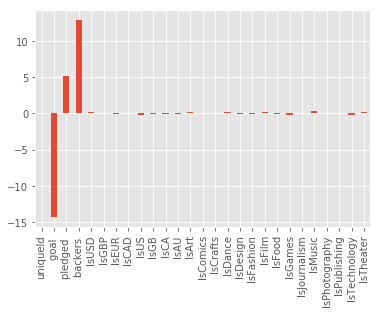

In [10]:
## code based on the provided file
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=df.columns)
weights.plot(kind='bar')
plt.show()

### SVM

A support vector machine (SVM) is a classification technique based on statistical learning. The following code is our attempt to create a model using SVM.

In [11]:
##code for next three cells is based on the provided file
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_scl = StandardScaler()
lr_clf = LogisticRegression(penalty='l2', C=0.05) 

# create the pipline
piped_object = Pipeline([('scale', std_scl),  
                         ('logit_model', lr_clf)])

weights = []
# run the pipline cross validated
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    piped_object.fit(X[train_indices],y[train_indices])  
    weights.append(piped_object.named_steps['logit_model'].coef_[0])
    
weights = np.array(weights)

In [12]:
# okay, so run through the cross validation loop and set the training and testing variable for one single iteration
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) 
X_test_scaled = scl_obj.transform(X_test) 

In [13]:
#This was an attempt to run standard SVM, but it was incredibly inefficient due to the size of our dataset

#from sklearn.svm import SVC

# train the model 
#svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') 
#svm_clf.fit(X_train_scaled, y_train)  

#y_hat = svm_clf.predict(X_test_scaled) 

#acc = mt.accuracy_score(y_test,y_hat)
#conf = mt.confusion_matrix(y_test,y_hat)
#print('accuracy:', acc )
#print(conf)

### SVM with Stochastic Gradient Descent

Due to the size of our dataset (roughly 320,000 records), the standard SVM model takes far too long to train (we gave up after 10 minutes). Therefore, we need to use stochastic gradient descent. SGD drastically reduces the computational power needed to create a model using SVM. 

In [14]:
## based on code from the file
# divide data into test and train
from sklearn.model_selection import StratifiedShuffleSplit 

cv = StratifiedShuffleSplit( n_splits=1,test_size=0.2)

In [33]:
%%time
## code is based on the file though the next cells experiment with parameters
# linear SVM classifier with stochastic descent
from sklearn.linear_model import SGDClassifier

regularize_const = 0.1
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', max_iter=iterations, n_jobs=-1, penalty='l2')

scl = StandardScaler()
for train_idx, test_idx in cv.split(X,y):
    svm_sgd.fit(scl.fit_transform(X[train_idx]),y[train_idx])
    yhat = svm_sgd.predict(scl.transform(X[test_idx]))
    
    conf = mt.confusion_matrix(y[test_idx],yhat)
    acc = mt.accuracy_score(y[test_idx],yhat)

print('SVM:', acc)

('SVM:', 0.74478971085242207)
CPU times: user 630 ms, sys: 120 ms, total: 750 ms
Wall time: 730 ms


In [20]:
%%time
# changing parameter alpha for linear SVM classifier with stochastic descent
from sklearn.linear_model import SGDClassifier

regularize_const = 0.05
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', max_iter=iterations, n_jobs=-1, penalty='l2')

scl = StandardScaler()
for train_idx, test_idx in cv.split(X,y):
    svm_sgd.fit(scl.fit_transform(X[train_idx]),y[train_idx])
    yhat = svm_sgd.predict(scl.transform(X[test_idx]))
    
    conf = mt.confusion_matrix(y[test_idx],yhat)
    acc = mt.accuracy_score(y[test_idx],yhat)

print('SVM:', acc)

('SVM:', 0.66447615471273003)
CPU times: user 680 ms, sys: 90 ms, total: 770 ms
Wall time: 745 ms


In [34]:
%%time
# changing parameter loss for linear SVM classifier with stochastic descent
from sklearn.linear_model import SGDClassifier

regularize_const = 0.05
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='perceptron', max_iter=iterations, n_jobs=-1, penalty='l2')

scl = StandardScaler()
for train_idx, test_idx in cv.split(X,y):
    svm_sgd.fit(scl.fit_transform(X[train_idx]),y[train_idx])
    yhat = svm_sgd.predict(scl.transform(X[test_idx]))
    
    conf = mt.confusion_matrix(y[test_idx],yhat)
    acc = mt.accuracy_score(y[test_idx],yhat)

print('SVM:', acc)

('SVM:', 0.77677118537989731)
CPU times: user 640 ms, sys: 110 ms, total: 750 ms
Wall time: 726 ms


In [21]:
%%time
## code is based on the file though the next cell experiments with parameters
# logistic regression classifier with stochastic descent
regularize_const = 0.1
log_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', max_iter=iterations, n_jobs=-1, penalty='l2')

scl = StandardScaler()
for train_idx, test_idx in cv.split(X,y):
    log_sgd.fit(scl.fit_transform(X[train_idx]),y[train_idx])
    yhat = log_sgd.predict(scl.transform(X[test_idx]))
    
    conf = mt.confusion_matrix(y[test_idx],yhat)
    acc = mt.accuracy_score(y[test_idx],yhat)

print('Logistic Regression:', acc)

('Logistic Regression:', 0.65705970709725869)
CPU times: user 1.02 s, sys: 90 ms, total: 1.11 s
Wall time: 920 ms


In [22]:
%%time
# changing parameter alpha for logistic regression classifier with stochastic descent
regularize_const = 0.05
log_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', max_iter=iterations, n_jobs=-1, penalty='l2')

scl = StandardScaler()
for train_idx, test_idx in cv.split(X,y):
    log_sgd.fit(scl.fit_transform(X[train_idx]),y[train_idx])
    yhat = log_sgd.predict(scl.transform(X[test_idx]))
    
    conf = mt.confusion_matrix(y[test_idx],yhat)
    acc = mt.accuracy_score(y[test_idx],yhat)

print('Logistic Regression:', acc)

('Logistic Regression:', 0.68035736637877076)
CPU times: user 1.14 s, sys: 130 ms, total: 1.27 s
Wall time: 1.09 s


### Model Advantages

Logistic Regression:
This model resulted in an accuracy of about 0.635 +/- 0.005. This was the worst accuracy value out of all of the models. Furthermore, it was slightly slower than the fastest model though the difference wasn't large enough to make a practical difference with a dataset of our size. However, when we change the class_weight parameter to 'balanced', it drastically improves the accuracy to about 0.910 +/- 0.0005. 

Logistic Regression with Normalized Weights:
This model resulted in an accuracy of about 0.820 +/- 0.005. Out of all our models (excluding standard SVM) this one took the most time for training. However, the resulting accuracy was far better than most other models, making the time increase of roughly 2 seconds worth the trade-off. 

SVM:
Due to the size of our dataset (about 320,000 records), standard SVM was incredibly inefficient. We tried running and waited 10 minutes for no results.

Linear SVM Classifier with Stochastic Gradient Descent:
This model resulted in an accuracy of about 0.655 +/- 0.005. This was the quickest for training the model. However, when we changed the alpha parameter from 0.1 to 0.05, the model's accuracy increased to about 0.665 +/- 0.005. Then changing the loss parameter increased accuracy to 0.775 +/- 0.005. SGDClassifier documentation states that perceptron is still a linear function, it is based on something called the perceptron algorithm.

Logistic SVM Classifier with Stochastic Gradient Descent:
This model resulted in an accuracy of about 0.660 +/- 0.005. However, when we changed the alpha parameter from 0.1 to 0.05, the model's accuracy increased to about 0.680 +/- 0.005. While this method was slightly slower than linear SVM classifier, the value is so small (less than a second) that it makes no practical difference (at least with a dataset of our size).

### Weighted Interpretation

In [23]:
# reprint the normalized weights from logistic regression
zip_vars = zip(lr_clf.coef_.T,df.columns) 
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) 

('goal ', 'has weight of', -17.280937650373307)
('IsTechnology', 'has weight of', -0.27351856359757176)
('IsCA', 'has weight of', -0.20546199129108381)
('IsGames', 'has weight of', -0.20434258374837544)
('IsUS', 'has weight of', -0.20338313332322094)
('IsDesign', 'has weight of', -0.14848625456163714)
('IsGB', 'has weight of', -0.14709770145142226)
('IsFashion', 'has weight of', -0.095744199459527363)
('IsEUR', 'has weight of', -0.095008844164307077)
('IsFood', 'has weight of', -0.08724862468678303)
('IsAU', 'has weight of', -0.071690289325198719)
('IsJournalism', 'has weight of', -0.036028488679081906)
('IsCrafts', 'has weight of', -0.016732189347489233)
('IsPublishing', 'has weight of', -0.0063533611310023601)
('uniqueId', 'has weight of', 0.0014016165777154266)
('IsPhotography', 'has weight of', 0.0023288317530561846)
('IsComics', 'has weight of', 0.07711132570457245)
('IsGBP', 'has weight of', 0.092601737117592731)
('IsUSD', 'has weight of', 0.10186316896017872)
('IsFilm', 'has wei

Note: UniqueID is simply an identifier variable. The groups is'country' and is'currency' practically measure the same thing and have a similar interpretation so we will just look at is'country'. Therefore, for this analysis we will not look at the variables uniqueID and the Is'currency' group.

Based on the weights from the above table, it is clear that the three variables that contribute the most to the model are goal, backers, and pledged. The variable groups Is'category' and Is'country' are not nearly as significant. Ultimately, the three variables with the most extreme weight values provide the most predictive power to the model. This also makes logical sense as the success of a Kickstarter project depends on the money raised. This is reflected in the top three variables. Goal looks at how much money an individual wants to raise where a higher goal reduces the odds of success as they need more money to succeed. Backers is a loose metric for how much money is coming in as more backers generally means more money going to the project. Pledged is a direct measurement of how much money is coming in. 

The Is'country' group of variables seems to account for cultural/language differences in raising money or how prevalent Kickstarter is in different countries. The weights for these variables are relatively small meaning that they don't have a lot of explanatory power in the model. However, it is interesting to note that the variable IsUS has the biggest weight of the Is'country' group. While this is merely conjecture, Kickstarter could be more prevalent in the United States (Kickstarter is an American company). It could also show that a project raises more money if it is in English since other English-majority countries like Canada and the UK seem to be weighted more as well. 

The Is'category' variable refers to different categories that a project can fall into. The low weight for this variable implies that categories do not have much predictive power in this model. Of particular interst are the variables IsTechnology and IsGames which have the largest negative weights within the group as well as the variables IsMusic and IsTheater which have the largest positive weights within the group. This means that projects in the Technology or Games categories are less likely to succeed while the projects in the Music or Theater categories are more likely to succeed. 

### Sub-sampling Data

In this section we will sample a small part of our dataset and then run Stochastic Gradient Descent in order to see if that will improve our accuracy and/or efficiency. We deciced to use a subsample of 20,000 randomly chosen entries.

In [24]:
df_sample = df.sample(n=20000)
df_sample.head()

,uniqueId,goal,pledged,backers,IsUSD,IsGBP,IsEUR,IsCAD,IsUS,IsGB,...,IsFashion,IsFilm,IsFood,IsGames,IsJournalism,IsMusic,IsPhotography,IsPublishing,IsTechnology,IsTheater
9851,67015130,1500.0,1775.0,32,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
252986,1699397680,10000.0,56.0,5,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
76075,511833907,1500.0,2018.0,46,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
184434,1241816384,1000.0,15.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
87866,592141508,25000.0,28066.0,327,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [25]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'bl_states' in df_sample:
    y_sam = df_sample['bl_states'].values 
    del df_sample['bl_states'] 
    X_sam = df_sample.values 

num_cv_iterations = 5
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=5, random_state=None, test_size=0.2, train_size=None)


In [26]:
from sklearn.model_selection import StratifiedShuffleSplit 

cv = StratifiedShuffleSplit( n_splits=1,test_size=0.2)

In [27]:
%%time
# linear SVM classifier with stochastic descent
from sklearn.linear_model import SGDClassifier

regularize_const = 0.1
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', max_iter=iterations, n_jobs=-1, penalty='l2')

scl = StandardScaler()
for train_idx, test_idx in cv.split(X,y):
    svm_sgd.fit(scl.fit_transform(X[train_idx]),y[train_idx])
    yhat = svm_sgd.predict(scl.transform(X[test_idx]))
    
    conf = mt.confusion_matrix(y[test_idx],yhat)
    acc = mt.accuracy_score(y[test_idx],yhat)

print('SVM:', acc)

('SVM:', 0.65720052572286891)
CPU times: user 960 ms, sys: 120 ms, total: 1.08 s
Wall time: 1.03 s


As we can see from results above subsampling helped up greatly increase efficiency (by reducing computation time) while giving us the same accuracy. 